<a href="https://colab.research.google.com/github/ArtyomHov/tensorflow-zero-to-mastery/blob/master/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks inTensorFlow
There are many definitions for regressions model but in our case, we are going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.13.0


### Creating a data to view and fit

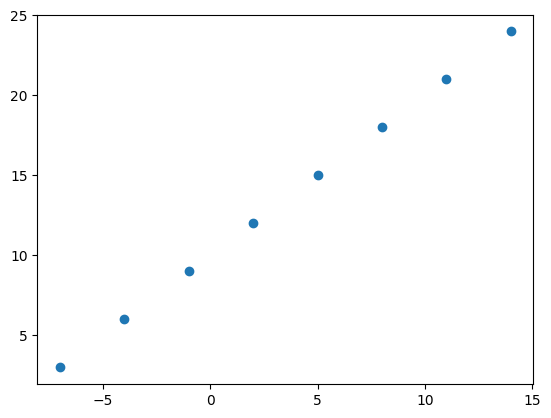

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y == 10 + X

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0].ndim

0

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
# Turn our numpy arrays into tensors

X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

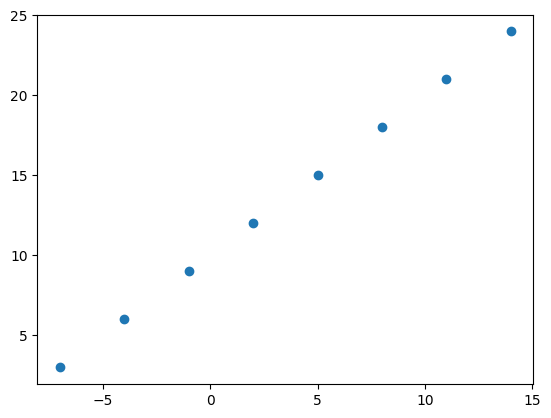

In [10]:
plt.scatter(X, y)

## Steps in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells out model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels)

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics = ["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 664ms/step - loss: 8.2025 - mae: 8.2025
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 8.0700 - mae: 8.0700
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 7.9375 - mae: 7.9375
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 7.8050 - mae: 7.8050
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 7.6725 - mae: 7.6725


In [12]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Try to make prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 116ms/step


array([[28.755856]], dtype=float32)

## Improving model

We can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave for training longer) or on more data (give the model more examples to learn)

In [14]:
# Let'srebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 442ms/step - loss: 19.7803 - mae: 19.7803
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 19.4991 - mae: 19.4991
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 19.2178 - mae: 19.2178
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 18.9366 - mae: 18.9366
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 18.6553 - mae: 18.6553
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 18.3741 - mae: 18.3741
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 18.0928 - mae: 18.0928
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 17.8116 - mae: 17.8116
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 17.5303 - mae: 17.5303
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 17.2491 - mae: 17.2491
Epoch 11/100
1/1 [==============================

In [15]:
# Remind ourselves of the data

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Let's see if our model's prediction has inproved

model.predict([17.0])

1/1 [==============================] - 0s 74ms/step


array([[29.302637]], dtype=float32)

In [17]:
# Let's see if we can make another change to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 946ms/step - loss: 13.3958 - mae: 13.3958
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.7359 - mae: 12.7359
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.0702 - mae: 12.0702
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.3945 - mae: 11.3945
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.7069 - mae: 10.7069
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 10.0057 - mae: 10.0057
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.2890 - mae: 9.2890
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 8.5547 - mae: 8.5547
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.8003 - mae: 7.8003
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 7.0232 - mae: 7.0232
Epoch 11/100
1/1 [==============================] - 0s 10

In [18]:
# Let's remind ourselves about the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 144ms/step


array([[27.035212]], dtype=float32)

## Evaluating a model
In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> Fit it -> evaluate it -> tweak a model ->  -> Fit it -> evaluate it -> tweak a model -> Fit it -> evaluate it -> tweak a model
```

When it comes to evaluation... there are 3 words you should memorise
> "Visualize, Visualize, Visualize"

It's good idea to visualize:

* The data - what data we are working with? What does it look like?
* The model itself - what does a model look like?
* The training of model - how does a model perform while it learns?
* The predictions of the model - how do the the predictions of a model line up against the ground truth (the original labels)?


In [20]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
# Make labels for dataset

y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

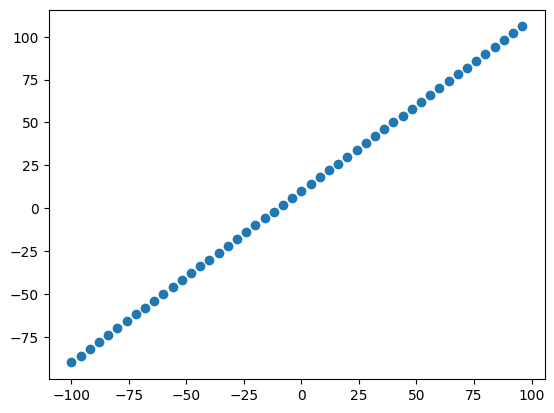

In [22]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)


### The 3 sets...

**Training set** - the model learns from this data, which is typically 70-80% of the total data you have available

**Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available

**Test set** - the model gets evaluated on this data to test what it has learned, which is typically 10-15% of the data available.


In [23]:
# Check the length of how many samples we have

len(X)

50

In [24]:
# Split the data into train and test sets

X_train = X[:40] # first 40 are training samples
y_train = y[:40]

X_test = X[40:] # last 10 are test samples
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

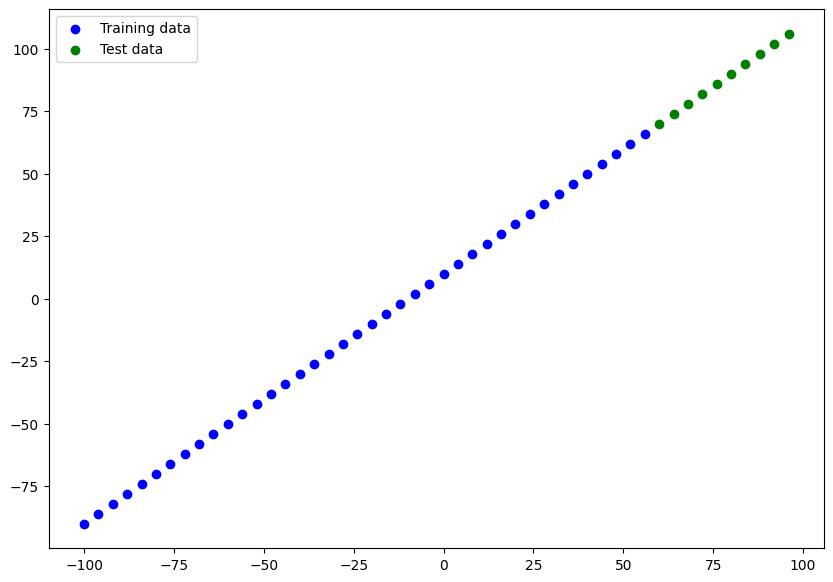

In [25]:
plt.figure(figsize = (10, 7))

# Plot training data in blue

plt.scatter(X_train, y_train, c = 'b', label = 'Training data')

# Plot test data in green

plt.scatter(X_test, y_test, c = 'g', label = 'Test data')

# Show legend

plt.legend()

In [26]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
#model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [28]:
model.summary()

ValueError: ignored

In [29]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer

tf.random.set_seed(42)

# Create a model (same as above)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='model_1')

# Compile a model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [30]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

📖**Resource:** For a more in depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning.

⚓**Exercise** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters total and trainable by calling model.summary()

In [31]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [32]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


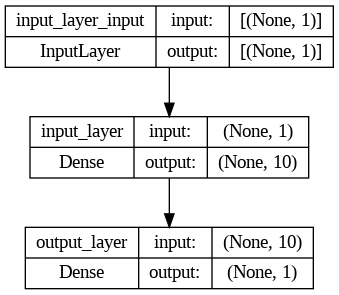

In [33]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions
To visualize predictions it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model predictions)

In [34]:
# Make some predictions

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 52ms/step


array([[ 75.90741 ],
       [ 80.85207 ],
       [ 85.79673 ],
       [ 90.741394],
       [ 95.68605 ],
       [100.63072 ],
       [105.57537 ],
       [110.52004 ],
       [115.46469 ],
       [120.40935 ]], dtype=float32)

**Note** If you feel like you are going to use some functionality in the future it's a good idea to turn it into a function

In [35]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", label = "Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot models predictions in red
  plt.scatter(test_data, predictions, c = "r", label = "Predictions")
  plt.legend()

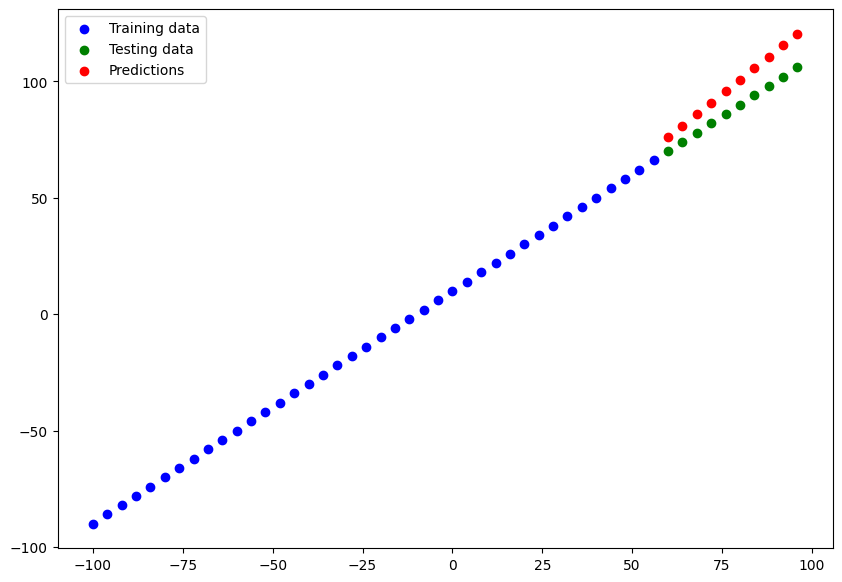

In [40]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics.
Depending on the problem you are working on, there will be different evaluation metric to evaluate your model's performance.

Since we are working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average", how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [36]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 103ms/step - loss: 10.1584 - mae: 10.1584


[10.158380508422852, 10.158380508422852]

In [46]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.655554, 11.259171, 10.040654, 10.148279, 11.474421, 13.978434,
       17.660297, 22.520042, 27.464691, 32.409348], dtype=float32)>

In [42]:
y_pred

array([[ 75.90741 ],
       [ 80.85207 ],
       [ 85.79673 ],
       [ 90.741394],
       [ 95.68605 ],
       [100.63072 ],
       [105.57537 ],
       [110.52004 ],
       [115.46469 ],
       [120.40935 ]], dtype=float32)

In [43]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [47]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 75.90741 ,  80.85207 ,  85.79673 ,  90.741394,  95.68605 ,
       100.63072 , 105.57537 , 110.52004 , 115.46469 , 120.40935 ],
      dtype=float32)>

In [51]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.158383>

In [54]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=110.55491>

In [56]:
# Make some functions to reause MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                        y_pred = y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                       y_pred = y_pred)